In [1]:
# importando as bibliotecas do Python que serão usadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from modulos import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

# Análise de Séries Temporais

## 1. O que é uma série temporal?

- Uma série temporal nada mais é que um conjunto de medidas de uma determinada variável ou fenômeno realizadas em sequência no tempo.

### Exemplos:
- <span style='background:yellow'>Gotas pingando em uma pia
- <span style='background:yellow'>Variação da temperatura do ar em um período
- <span style='background:yellow'>Produção mensal de uma fábrica
- <span style='background:yellow'>Crescimento populacional, taxa de mortalidade e natalidade

Séries temporais estão por toda parte. Tudo que sofre a ação do tempo e é suscetível a ser medido regularmente pode representar uma série temporal.

<img src='time.png' width=500 align=left>

## 2. Pra que serve uma análise de série temporal?

- <span style='background:cyan'>Avaliar como uma variável se comporta ao longo do tempo
- <span style='background:cyan'>Extrair padrões temporais e tendências
- <span style='background:cyan'>Guiar a projeção de cenários futuros e construção de modelos estatísticos preditivos 
- <span style='background:cyan'>Avaliar incertezas relacionadas à variável

## 3. Componentes

Uma série temporal é composta de 4 componentes principais:
- <span style='background:yellow'>Tendência
- <span style='background:yellow'>Sazonalidade
- <span style='background:yellow'>Ciclicidade
- <span style='background:yellow'>Irregularidade (ou residual)
    
Obs: não necessariamente as séries temporais apresentam todas as componentes

<img src='ciclo.png' width="600" height="450" align=left>

### 3.1 Tendência
- A tendência de uma série temporal é a componente que representa a <span style='background:cyan'>taxa de variação de uma variável a longo prazo</span>, podendo ser positiva, negativa ou inexistente.
- É representada por uma reta com determinada inclinação, quanto maior essa inclinação, maior a taxa de variação no tempo.

<img src='tend.png' width="500" height="350" align=left>

### 3.2 Sazonalidade
- Muitas variáveis possuem comportamento sazonal, mostrando um padrão de variabilidade dentro de um determinado intervalo de tempo que acaba se repetindo (podemos prevê-lo)
- A distância entre um pico e outro da série temporal se mantém aproximadamente fixa
- A chuva, por exemplo, possui um caráter bastante sazonal em boa parte do globo

<img src='1.png' width="500" height="350" align=left>
<img src='3.png' width="500" height="350" align=left>

### 3.3 Ciclicidade
- A ciclicidade é a componente que representa a variabilidade da série temporal <span style='background:yellow'>sem um intervalo fixo</span>
- É o efeito de circunstâncias externas sobre a variável que se repetem em intervalos irregulares, geralmente maiores que um ano
- A distância no intervalo de tempo entre um pico e outro é variável
- Padrões de teleconexão como o ENSO, por exemplo, podem ser um fator de ciclicidade em uma série temporal

### 3.4 Irregularidade
- A componente de irregularidade representa tudo aquilo que não é explicado por nenhuma das componentes anteriores
- É a <span style='background:cyan'>variabilidade aleatória e imprevisível</span> da série temporal de uma determinada variável, de tal forma que não se adequa a nenhum padrão no tempo.
- É a principal fonte de incertezas sobre o fenômeno analisado

<img src='1.png' width="500" height="350" align=left>
<img src='res.png' width="500" height="350" align=left>

## 4. Estacionariedade

Uma série temporal é estacionária quando <span style='background:yellow'>suas propriedades estatísticas (média, variância) se mantém constante no tempo</span>, de tal forma que a média de uma variável ao longo de um período passado X é a mesma num período futuro Y mesmo se os seus valores individuais são diferentes.
- Estacionariedade não implica que a variável não varie com o tempo
- <span style='background:cyan'>A existência de tendência ou sazonalidade nos dados é um indicativo de não-estacionariedade</span>
- É um requisito para muitas análises estatísticas e modelagem

#### &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Série temporal estacionária &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Série temporal não-estacionária

<img src='stat2.png' width="450" height="350" align=left>
<img src='nonstat.png' width="450" height="350">


### 4.1. Identificando se uma série é estacionária ou não

- <span style='background:yellow'>Média móvel

A média móvel pode ser uma boa medida preliminar para a identificação de tendências temporais e, por consequência, de estacionariedade. Como o proprio nome diz, a média móvel é uma média que se move ao longo da série temporal.

Ao invés de usar todos os valores da série temporal para o cálculo da média, a média móvel é o resultado das várias médias de pequenos intervalos temporais sucessivos dentro da série.

<img src='mms2.png' width=500 align=left>

- <span style='background:cyan'>Avaliar as estatísticas pra diferentes porções da série temporal:

In [235]:
# Posso dividir minha série temporal acima em 4 partes, calcular as estatísticas pra cada uma delas e comparar

medias = [temp[:54].mean(), temp[53:105].mean(), temp[105:160].mean(), temp[160:].mean()]
var = [temp[:54].var(), temp[53:105].var(), temp[105:160].var(), temp[160:].var()]

print('Médias:',medias)
print('Variâncias:',var)
print('')
print('Percebam as diferenças das estatísticas entre as diferentes porções da série!')

Médias: [24.0216384863124, 21.849839743589744, 17.696969696969692, 14.215064102564101]
Variâncias: [3.2195390709730125, 5.1012111666247675, 10.074044788159371, 15.708029108010729]

Percebam as diferenças das estatísticas entre as diferentes porções da série!


- <span style='background:yellow'>Testes estatísticos (teste de Dickey-Fuller)

### 4.2. Transformando séries não-estacionárias em estacionárias

Dois métodos são bastante comuns para transformar uma série não-estacionária em uma série onde podemos assumir estacionariedade:

- Remoção das componentes de tendência e sazonalidade
- Diferenciação da série temporal

#### 4.2.1 Remoção da tendência e sazonalidade

O primeiro passo é avaliar se a série temporal segue o modelo aditivo, onde a variabilidade da variável ao longo do tempo é linear; ou o modelo multiplicativo, onde a variabilidade é não-linear (exponencial, logarítmica, etc.) 

<span style='background:cyan'>Se aditivo:
- A série temporal Y(t) é resultado da soma entre as componentes de tendência (T), sazonalidade (S), ciclicidade (C) e irregularidade (I) 
- Y(t) = T + S + C + I

<span style='background:cyan'>Se multiplicativo:
- A série temporal Y(t) é resultado da multiplicação entre as componentes de tendência (T), sazonalidade (S), ciclicidade (C) e irregularidade (I)
- Y(t) = T x S x C x I

<span style='background:yellow'>Nos casos mais comuns de séries temporais dentro da área de meteorologia e climatologia, assume-se o modelo aditivo.
    
#### Logo:
- De maneira geral, para remover qualquer componente basta isolar e subtrair esta componente da série de dados.

#### 4.2.1.1 Removendo a tendência pela média móvel

In [26]:
# Aqui, simplesmente subtraímos a média móvel de 20 dias calculada da série temporal
media_movel = temp.rolling(window=20).mean()
notrend = (temp - media_movel)

<img src='mms2.png' width=460 align=left><img src='notrend5.png' width=460>

#### 4.2.1.2 Removendo a sazonalidade

Podemos remover a sazonalidade calculando o ciclo médio anual (a partir da série sem tendência) e o subtraindo da série temporal.

In [13]:
ciclo_anual = notrend3.groupby(notrend3.index.dayofyear).transform('mean')
noseason = temp - ciclo_anual

noseason_notrend = (noseason - noseason.rolling(window=365).mean()) # remove sazonalidade e tendência

<img src='tudo.png' width=460 align=left><img src='noseason6.png' width=460>

## 5. Modelo de regressão linear simples

Muitas vezes queremos entender o grau em que uma determinada variável influencia na variabilidade de outra. Conhecendo essa ligação podemos construir modelos para estimar valores futuros e, a partir daí, uma série de aplicações práticas surgem.
- A regressão linear descreve a relação entre duas variáveis x (variável independente) e y (variável dependente), linearmente
- Procura resumir essa relação através de uma reta com determinada inclinação
- Essa reta é dada pela fórmula <span style='background:cyan'>ŷ = a + bx</span> e representa o modelo linear capaz de prever ŷ contendo o menor erro possível
    - ŷ é o valor estimado de y
    - o coeficiente 'a' é o ponto de intesercção da reta com o eixo y
    - o coeficiente 'b' é a medida de inclinação da reta
- A diferença entre o valor observado (y) e o valor estimado (ŷ) na série é chamada de erro (e), ou resíduo, e representa a variação de y não conhecida/explicada pelo modelo. Quanto menor os valores dos erros, ou seja, quanto menor a distância entre ŷ e y, melhor é o modelo em representar a relação entre as duas variáveis.
    
<img src='model.png' width=460 align=left>

### 5.1 Método dos mínimos quadrados

Para se encontrar a reta ŷ = a + bx, um dos métodos mais utilizados é o método dos mínimos quadrados. 

Este método procura calcular a melhor reta (reta de melhor ajuste) para um determinado conjunto de dados minimizando a soma dos quadrados dos erros/resíduos (e).

Os coeficientes 'a' e 'b' são calculados a partir das fórmulas abaixo:

<img src='b.png' width=250><img src='a.png' width=150>

- onde x-barra e y-barra representam as médias de x e y, respectivamente.

In [2]:
# Vamos supor que eu tenha os seguintes conjuntos de dados
# onde a variavel independente é a pressão ao nível médio do mar (hPa) e a dependente é a temperatura do ar em superfície (°C):

temp = [26.1,24.5,24.8,24.5,24.1,24.3,26.4,24.9,23.7,23.5,24.0,24.1,23.7,24.3,26.6,24.6,24.8,24.4,26.8,25.2]
pressao = [1009.5,1010.9,1010.7,1011.2,1011.9,1011.2,1009.3,1011.1,1012.0,1011.4,1010.9,1011.5,1011.0,1011.2,1009.9,1012.5,1011.1,1011.8,1009.3,1010.6]

temp_media = np.mean(temp)
pressao_media = np.mean(pressao)

a = 959.7734806254197
b = -0.9248810333106681
Logo, a reta do modelo linear fica:
y = 959.773 -0.925x


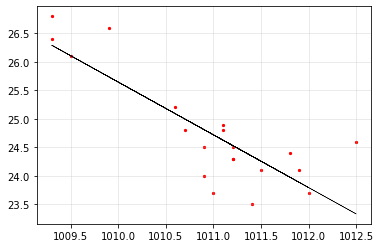

In [3]:
# Se calcularmos os coeficientes "a" e "b" para a reta ŷ = a + bx, teríamos o resultado:
model(pressao,temp)

#### <span style='background:yellow'>Podemos fazer o mesmo processo para séries temporais, onde a variável independente X é o tempo (em dias, meses ou anos):

<img src='modelos.png' width=1000 align=left>

#### A reta de regressão linear também pode ser usada para remover a tendência dos dados, da mesma forma que a média móvel!

In [198]:
x = np.arange(temp_2015.size)
fit = np.polyfit(x, temp_2015, 1)
fit_fn = np.poly1d(fit)

notrend_2015 = (temp_2015 - fit_fn(x))

<img src='notrend_model.png' width=500 align=left>

### 5.2 Avaliando a qualidade de ajuste do modelo
<span style='background:cyan'>Coeficiente de Determinação (R²)

- R² pode ser interpretado como a proporção da variabilidade dos dados que pode ser representada pelo modelo linear.
- É calculado pela razão entre a soma dos erros (resíduos) ao quadrado e a soma das diferenças ao quadrado entre cada valor de y observado e a média de y:

<img src='rquadrado6.png' width=220><img src='erro.png' width=150>

- Quanto mais próximo de 1 é o R², melhor é o ajuste do modelo.



In [4]:
def r2(x,y): #calcula o R²
    if (type(x) is pd.core.indexes.datetimes.DatetimeIndex) or (type(x) is datetime.datetime) or (type(x) is pandas.Timestamp):
        x = list(range(1,len(x)+1,1))
    y_mean = np.mean(y)
    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit)

    nominador = []
    denominador = []
    for yi,yx in zip(y,fit_fn(x)): 
        nominador.append((yi-yx)**2)
        denominador.append((yi-y_mean)**2)
    c2 = np.sum(nominador)
    d2 = np.sum(denominador)
    r_quadrado = 1 - (c2/d2)
    if (r_quadrado <= 1e-3):
        r_quadrado = 0
    return r_quadrado

In [9]:
# passando os meus dados de 2015 e total para a função r² acima:
r2(data_2015,temp_2015), r2(data,temp)

(0.5892167599173932, 0)